# Import the Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from tensorflow import keras
import time

from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the Dataset

In [ ]:
x_test = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test/x_test.csv"))
x_train = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train/x_train.csv"))
y_test = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test/y_test.csv"))
y_train = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train/y_train.csv"))

# Data Pre-processing

In [ ]:
x_train = x_train/255
x_test = x_test/255
x_train= x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28,28,1))

# Create a Basic Model

In [ ]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same', activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same', activation='relu'))

model.add(keras.layers.Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(5, activation= 'softmax'))


In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

start_time = time.time()
default_model = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])
print(f"Default Model Training runtime {time.time() - start_time} seconds")

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 0.8925 - accuracy: 0.6414 - val_loss: 0.5758 - val_accuracy: 0.7847
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.5429 - accuracy: 0.7984 - val_loss: 0.5130 - val_accuracy: 0.7959
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4687 - accuracy: 0.8272 - val_loss: 0.4417 - val_accuracy: 0.8304
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4225 - accuracy: 0.8453 - val_loss: 0.3979 - val_accuracy: 0.8531
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3938 - accuracy: 0.8572 - val_loss: 0.3787 - val_accuracy: 0.8605
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3698 - accuracy: 0.8663 - val_loss: 0.3648 - val_accuracy: 0.8692
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.3524 - accuracy: 0.8750 - val_loss: 0.4086 - val_accuracy: 0.856

In [ ]:
start_time = time.time()
default_ev = model.evaluate(x_test,y_test)
print(f"Default Model Test runtime {time.time() - start_time} seconds")

313/313 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.8969
Default Model Test runtime 4.8086628913879395 seconds


In [ ]:
print ('Test Loss ', default_ev[0]*100)
print ('Test accuracy', default_ev[1]*100)

Test Loss  29.206815361976624
Test accuracy 89.68999981880188


Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Default Model')

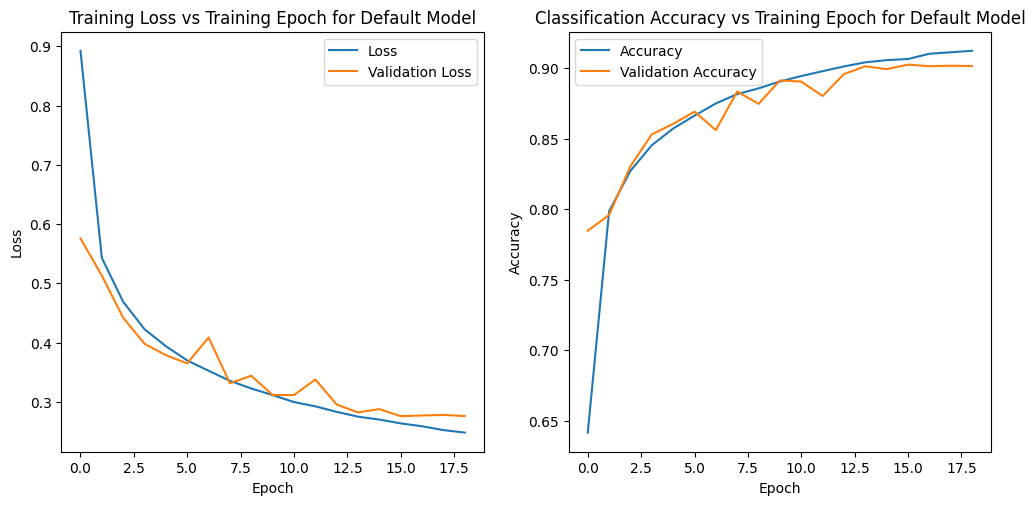

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.plot(default_model.history['loss'], label='Loss')
plt.plot(default_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Default Model')

plt.subplot(2, 2, 2)
plt.plot(default_model.history['accuracy'], label='Accuracy')
plt.plot(default_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Default Model')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                401472    
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                      

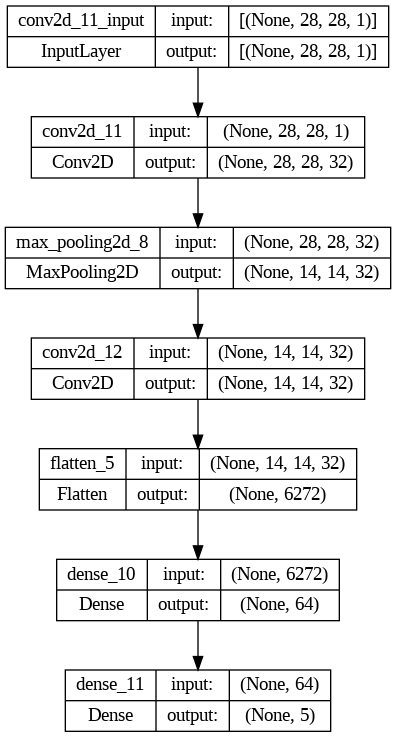

In [ ]:
plot_model(model, to_file='default_model_plot.png', show_shapes=True, show_layer_names=True)

Basic model gave the accuracy of 92.129%.
Now let's try to change the optimizer to Adam and check the reults of model

## Using Adam optimiser

In [ ]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same' , activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same', activation='relu'))

model.add(keras.layers.Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(5, activation= 'softmax'))

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_1 = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/100
375/375 [==============================] - 4s 5ms/step - loss: 0.4013 - accuracy: 0.8506 - val_loss: 0.2949 - val_accuracy: 0.8958
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2491 - accuracy: 0.9110 - val_loss: 0.2343 - val_accuracy: 0.9167
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2126 - accuracy: 0.9246 - val_loss: 0.2112 - val_accuracy: 0.9254
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1825 - accuracy: 0.9348 - val_loss: 0.1901 - val_accuracy: 0.9297
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1608 - accuracy: 0.9430 - val_loss: 0.1921 - val_accuracy: 0.9302
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1449 - accuracy: 0.9480 - val_loss: 0.1716 - val_accuracy: 0.9406
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1294 - accuracy: 0.9537 - val_loss: 0.1769 - val_accuracy: 0.9363

In [ ]:
model1_ev = model.evaluate(x_test,y_test)
print ('Test Loss ', model1_ev[0]*100)
print ('Test accuracy', model1_ev[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1951 - accuracy: 0.9371
Test Loss  19.51473355293274
Test accuracy 93.70999932289124


Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Model 1')

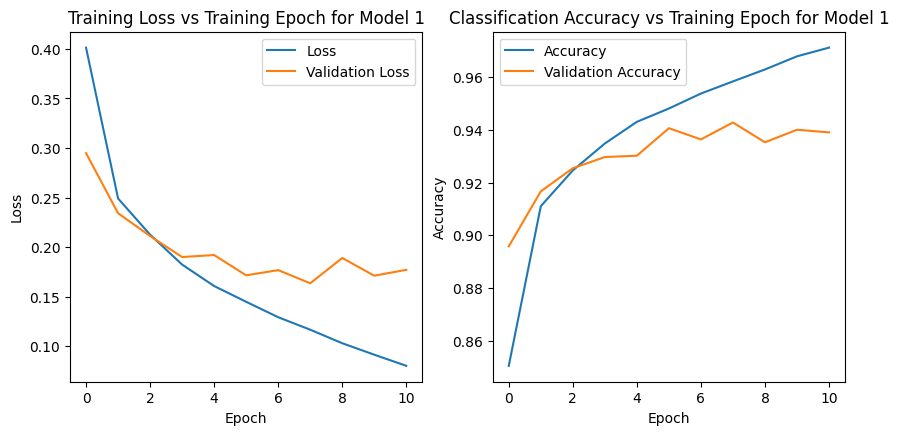

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_1.history['loss'], label='Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Model 1')

plt.subplot(2, 2, 2)
plt.plot(model_1.history['accuracy'], label='Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Model 1')

The performance of model improves but the model is overfitting as seen from learning loss curve (validation loss > training loss), so to avoid overfitting add batch normalization and max pooling layer after second convolution layer.

## Adding Batch Normalization and Max Pooling layers

In [ ]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_2 = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])

model2_ev = model.evaluate(x_test,y_test)
print ('Test Loss ', model2_ev[0]*100)
print ('Test accuracy', model2_ev[1]*100)

Epoch 1/100
375/375 [==============================] - 6s 6ms/step - loss: 0.2853 - accuracy: 0.8971 - val_loss: 1.1910 - val_accuracy: 0.5092
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1846 - accuracy: 0.9343 - val_loss: 0.2742 - val_accuracy: 0.9016
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1559 - accuracy: 0.9444 - val_loss: 0.2897 - val_accuracy: 0.9003
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1305 - accuracy: 0.9538 - val_loss: 0.1953 - val_accuracy: 0.9334
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1142 - accuracy: 0.9590 - val_loss: 0.2035 - val_accuracy: 0.9288
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1023 - accuracy: 0.9639 - val_loss: 0.1753 - val_accuracy: 0.9408
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0908 - accuracy: 0.9667 - val_loss: 0.1869 - val_accuracy: 0.9329

Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Model 2')

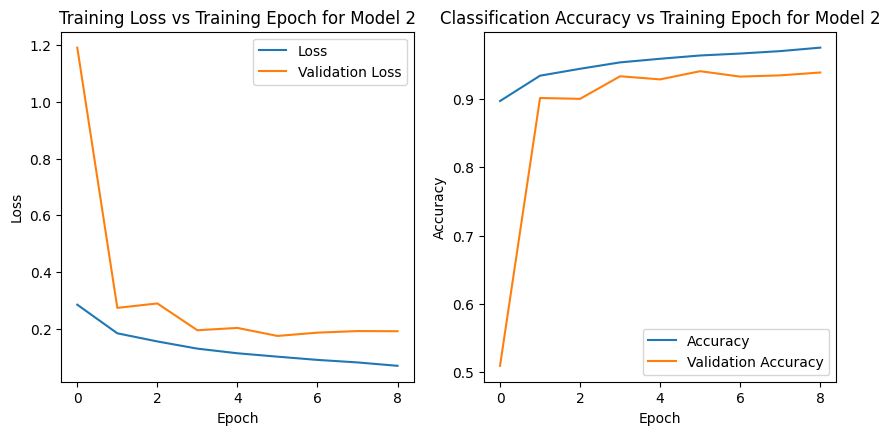

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_2.history['loss'], label='Loss')
plt.plot(model_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Model 2')

plt.subplot(2, 2, 2)
plt.plot(model_2.history['accuracy'], label='Accuracy')
plt.plot(model_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Model 2')

The performace has improved further but the model is still overfitting, so adding dropout layers, can probably improve our model’s performance.

## Adding dropout layers

In [ ]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_3 = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])

model3_ev = model.evaluate(x_test,y_test)
print ('Test Loss ', model3_ev[0]*100)
print ('Test accuracy', model3_ev[1]*100)

Epoch 1/100
375/375 [==============================] - 7s 8ms/step - loss: 0.4330 - accuracy: 0.8383 - val_loss: 1.1118 - val_accuracy: 0.5223
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2816 - accuracy: 0.8964 - val_loss: 0.2347 - val_accuracy: 0.9138
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2439 - accuracy: 0.9107 - val_loss: 0.2278 - val_accuracy: 0.9151
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.2249 - accuracy: 0.9181 - val_loss: 0.1831 - val_accuracy: 0.9310
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2079 - accuracy: 0.9234 - val_loss: 0.1844 - val_accuracy: 0.9347
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1966 - accuracy: 0.9291 - val_loss: 0.1869 - val_accuracy: 0.9332
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 0.1872 - accuracy: 0.9315 - val_loss: 0.1707 - val_accuracy: 0.9394

Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Model 3')

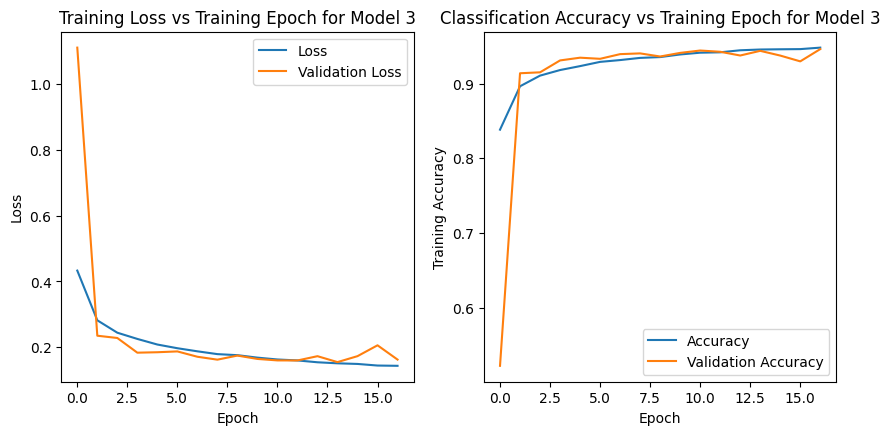

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_3.history['loss'], label='Loss')
plt.plot(model_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Model 3')

plt.subplot(2, 2, 2)
plt.plot(model_3.history['accuracy'], label='Accuracy')
plt.plot(model_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Model 3')

Now, let’s build a new, better model. As previously stated, the sole addition of dropout layers could improve the test accuracy to 94.02%. There is still room to build a more robust CNN. 
After a few tests, we try including a third convolutional layer. Let’s check the performance of this new model.

# Our own Custom Model 

In [ ]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

start_time = time.time()
custom_model = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])
print(f"Custom Model Training runtime {time.time() - start_time} seconds")

Epoch 1/100
375/375 [==============================] - 6s 9ms/step - loss: 0.3953 - accuracy: 0.8485 - val_loss: 1.0972 - val_accuracy: 0.6327
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2520 - accuracy: 0.9064 - val_loss: 0.2258 - val_accuracy: 0.9189
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 0.2149 - accuracy: 0.9210 - val_loss: 0.1912 - val_accuracy: 0.9277
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1948 - accuracy: 0.9290 - val_loss: 0.2092 - val_accuracy: 0.9219
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1790 - accuracy: 0.9339 - val_loss: 0.1675 - val_accuracy: 0.9356
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1671 - accuracy: 0.9397 - val_loss: 0.2014 - val_accuracy: 0.9273
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1569 - accuracy: 0.9426 - val_loss: 0.1610 - val_accuracy: 0.940

In [ ]:
start_time = time.time()
custom_model_ev = model.evaluate(x_test,y_test)
print(f"Custom Test runtime {time.time() - start_time} seconds")

313/313 [==============================] - 1s 3ms/step - loss: 0.1648 - accuracy: 0.9416
Custom Test runtime 1.3694865703582764 seconds


In [ ]:
print ('Test Loss ', custom_model_ev[0]*100)
print ('Test accuracy', custom_model_ev[1]*100)
model.summary()

Test Loss  16.482898592948914
Test accuracy 94.16000247001648
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 64)        18496     
                                                         

The effect of the dropout layers can be observed by looking at the learning curves.
The validation loss decreases for a longer period, reaching lower values than the one found in our default model, and it stabilizes at a certain point. The new model reached a test accuracy of 94.23%, beating the default model. This model will be used as Own network model.

Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Custom Model')

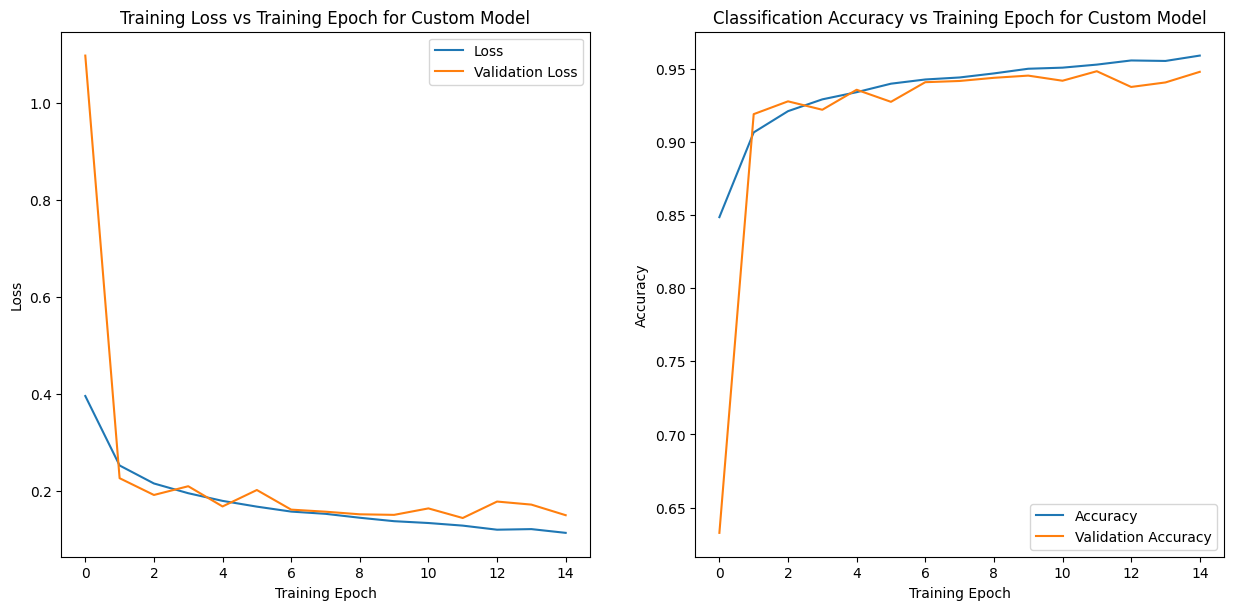

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(custom_model.history['loss'], label='Loss')
plt.plot(custom_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Training Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Custom Model')

plt.subplot(2, 2, 2)
plt.plot(custom_model.history['accuracy'], label='Accuracy')
plt.plot(custom_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Custom Model')

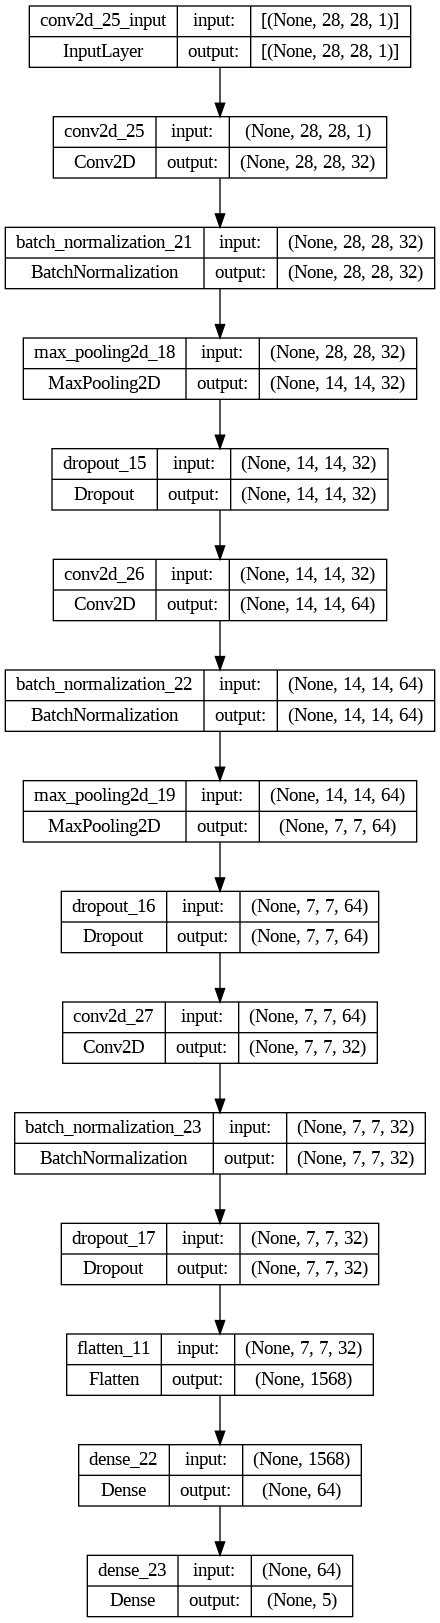

In [ ]:
plot_model(model, to_file='custom_model_plot.png', show_shapes=True, show_layer_names=True)